# LetsGrowMore-Virtual Internship Program(VIP)-DataScience

## Author: REVATHY REMESH

#### Problem Statement: 

From the given ‘Iris’ dataset, predict the given dataset using decision tree algorithm.

**Overview**<br>
 'Iris.csv' dataset contain different  measurements of three types of iris.We need to crete the decision tree algorithum and visualize it graphically

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Visualize the data
4. Prepare the data for modelling
5. Modelling
6. Final Analysis 

# 1. Read and visualise the data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

### Importing Dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Inspecting Dataframe

In [4]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 150
Number of columns: 6


In [5]:
# basics of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


 ## 2. Clean the data

In [7]:
#dropping index column,because it has unique values
df.drop(labels=None, axis=1, index=None, columns='Id', level=None, inplace=True, errors='raise')

 ## 3. Visualize the data

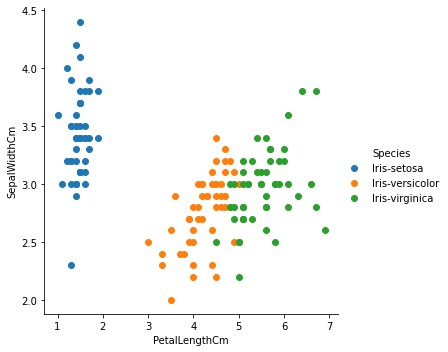

In [8]:
sns.FacetGrid(df,hue='Species',size=5).map(plt.scatter,'PetalLengthCm','SepalWidthCm').add_legend();
plt.show()

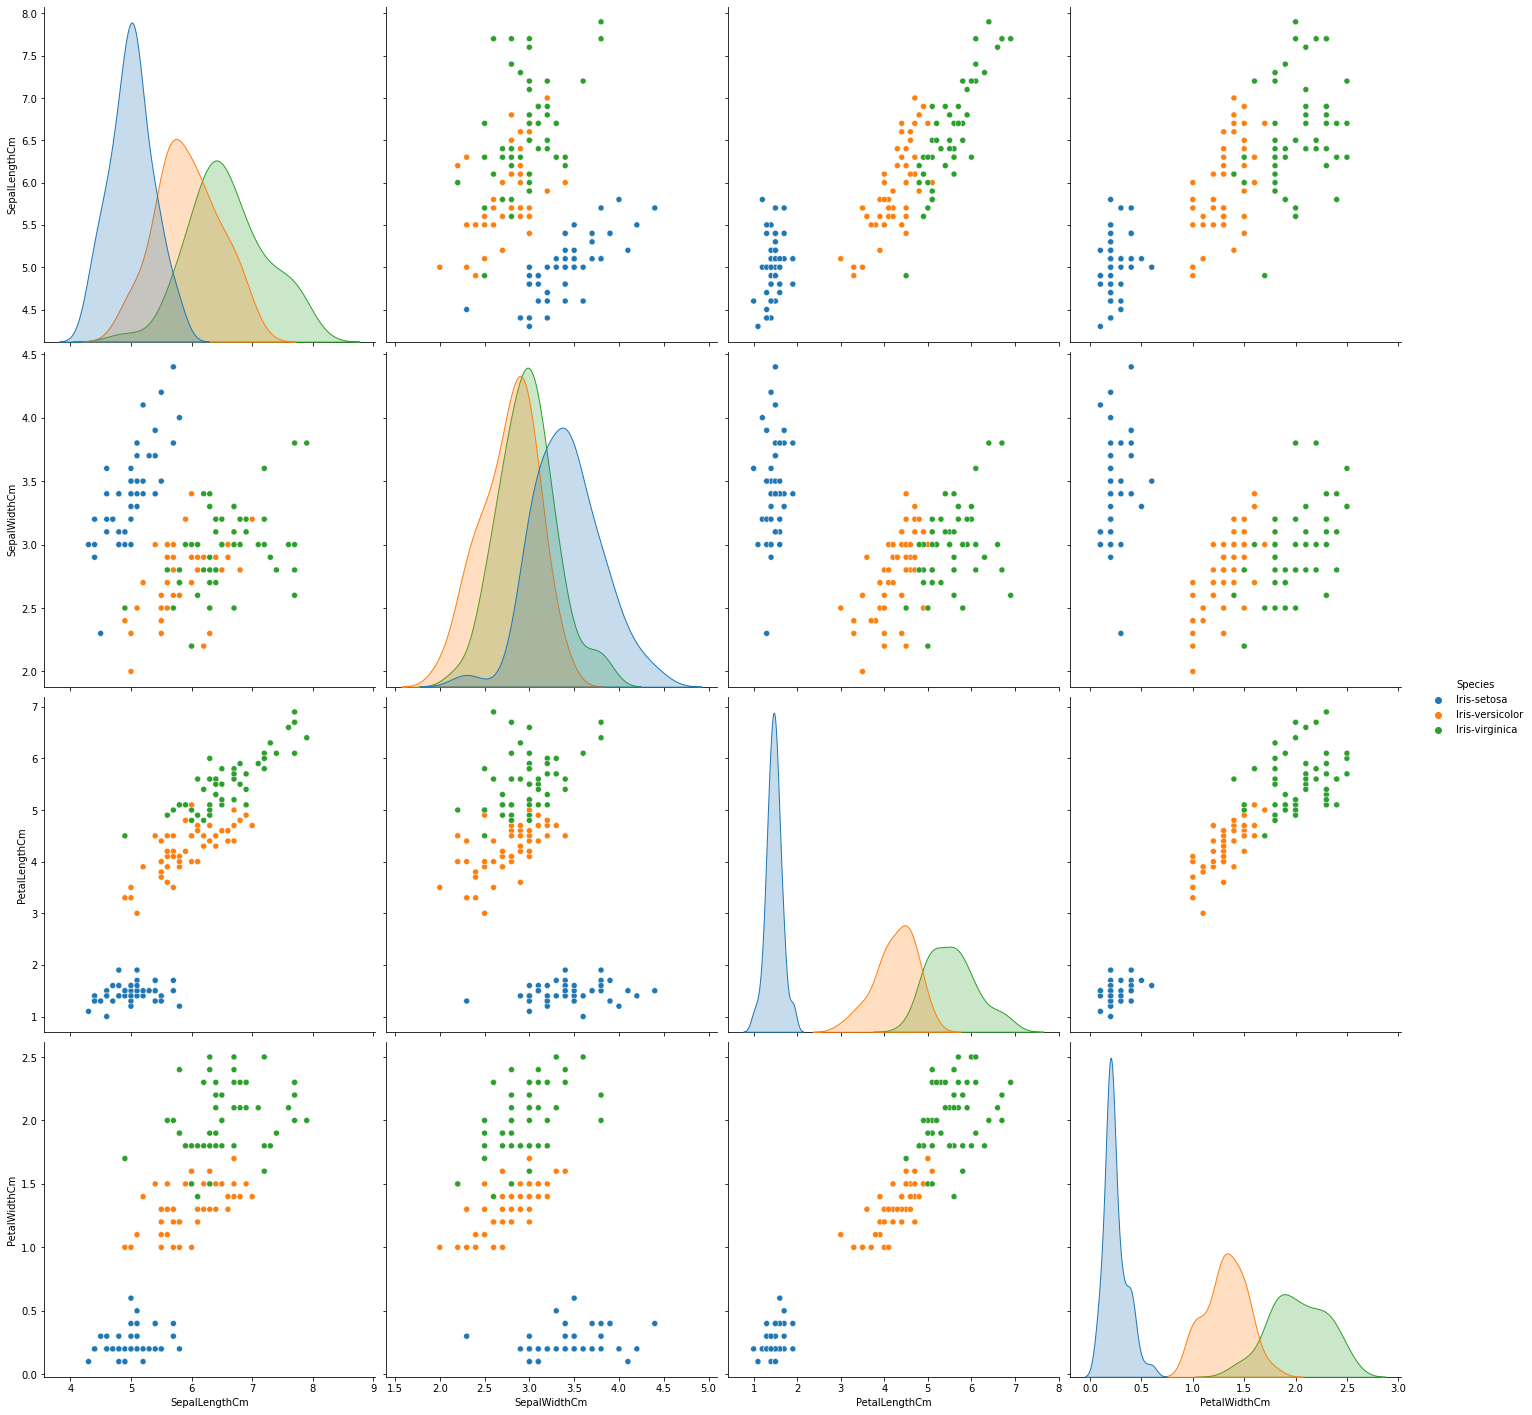

In [9]:
#pairplot
sns.pairplot(df,hue='Species',size=5)
plt.show()

### Preprocessing the data

Right after we download the dataset, there are several assumptions to meet. They are,

.Each column has a normal distribution (no left or right-skewed)

.Each column should have the same value range

The reason we have to check those assumptions is to make sure that we can use the machine learning model to the data. To know if the data fulfills the assumptions, we have to explore it visually. We can visualize each column using a histogram. The code looks like this,

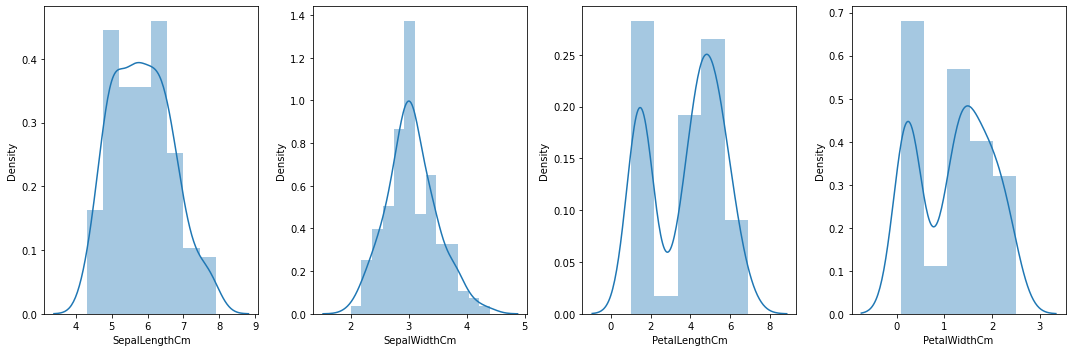

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(15,5))
sns.distplot(df.SepalLengthCm, ax=ax[0])
sns.distplot(df.SepalWidthCm , ax=ax[1])
sns.distplot(df.PetalLengthCm , ax=ax[2])
sns.distplot(df.PetalWidthCm , ax=ax[3])
plt.tight_layout()
plt.show()

As we can see above, the distribution on each column is closer to a normal

##  4.Prepare the data for modelling

In [11]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

## 5. Modelling

In [12]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [14]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=2)
model.fit(X_train,y_train)

DecisionTreeClassifier()

## 6. Final Analysis

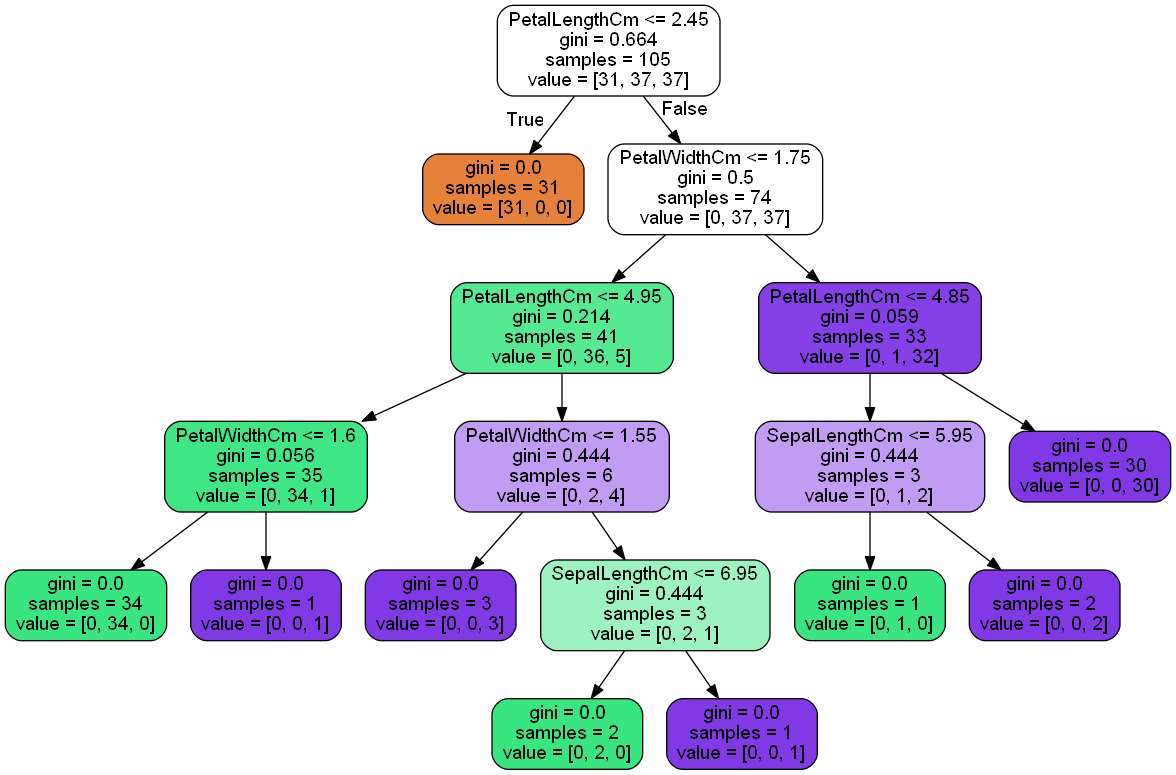

In [15]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(model, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


## THANK YOU